In [16]:
import tensorflow as tf
from keras import layers
import matplotlib.pyplot as plt


BATCH_SIZE = 64
IMG_SIZE = (128, 128)
PROJECT_DIR = ".."
DATA_DIR = f"{PROJECT_DIR}/data/processed/PlantVillage_Binary"
AUTOTUNE = tf.data.AUTOTUNE
BUFFER_SIZE = 2
LABEL_MODE = 'binary'  # Change to '' for no labels

In [17]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU memory growth set to True")
    except RuntimeError as e:
        print(e)

GPU memory growth set to True


In [18]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=f"{DATA_DIR}/train",
    labels="inferred",
    label_mode=LABEL_MODE,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    f"{DATA_DIR}/val",
    labels="inferred",
    label_mode=LABEL_MODE,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    f"{DATA_DIR}/test",
    labels="inferred",
    label_mode=LABEL_MODE,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 37005 files belonging to 2 classes.
Found 13817 files belonging to 2 classes.
Found 13842 files belonging to 2 classes.


In [19]:
class_names = train_ds.class_names

In [20]:
train_ds = train_ds.shuffle(100).prefetch(buffer_size=BUFFER_SIZE)
val_ds = val_ds.prefetch(buffer_size=BUFFER_SIZE)
test_ds = test_ds.prefetch(buffer_size=BUFFER_SIZE)

In [21]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2),
])

In [22]:
normalization_layer = layers.Rescaling(1./255)

2025-08-27 11:46:24.388361: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


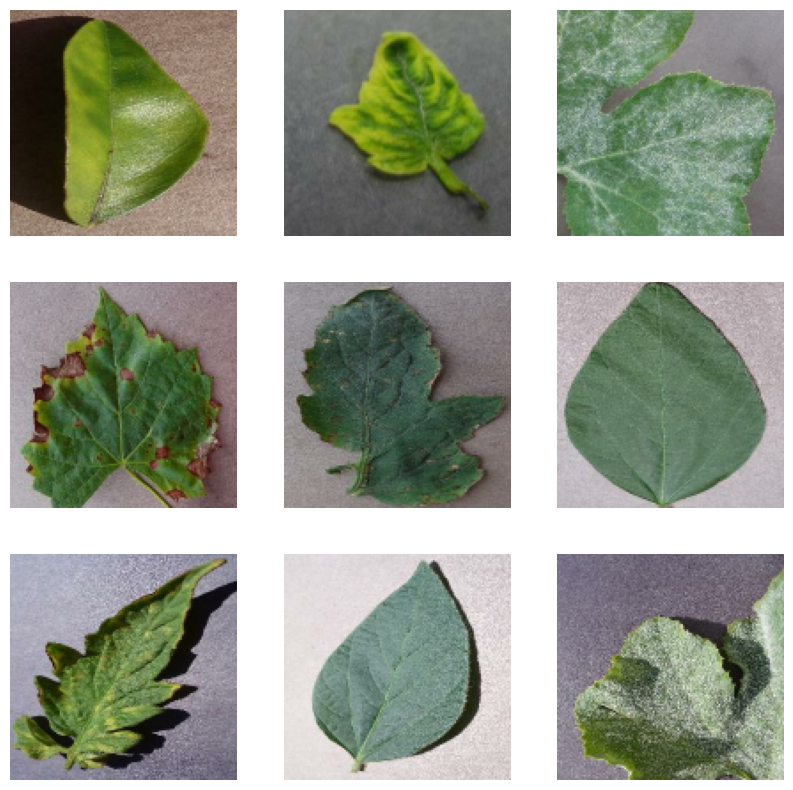

In [23]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(min(9, images.shape[0])):  # Ensure we don't exceed the batch size
        ax = plt.subplot(3, 3, i + 1)
        img = data_augmentation(images)[i]
        img = normalization_layer(images)[i]
        plt.imshow(img.numpy())
        plt.axis("off")
plt.show()


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(128, 128, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # freeze base

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')  # adjust this
])


KeyboardInterrupt: 

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


I0000 00:00:1756293081.764168   17995 service.cc:152] XLA service 0x565ee7e58210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756293081.764195   17995 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX230, Compute Capability 6.1
2025-08-27 11:11:21.853203: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1756293082.504702   17995 cuda_dnn.cc:529] Loaded cuDNN version 90300


  15/9252 ━━━━━━━━━━━━━━━━━━━━ 1:45 11ms/step - accuracy: 0.4186 - loss: 1.1014 

I0000 00:00:1756293089.157783   17995 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9252/9252 ━━━━━━━━━━━━━━━━━━━━ 203s 21ms/step - accuracy: 0.9360 - loss: 0.1599 - val_accuracy: 0.9741 - val_loss: 0.0667
Epoch 2/10
9252/9252 ━━━━━━━━━━━━━━━━━━━━ 189s 20ms/step - accuracy: 0.9720 - loss: 0.0732 - val_accuracy: 0.9820 - val_loss: 0.0521
Epoch 3/10
9252/9252 ━━━━━━━━━━━━━━━━━━━━ 190s 21ms/step - accuracy: 0.9808 - loss: 0.0566 - val_accuracy: 0.9844 - val_loss: 0.0453
Epoch 4/10
9252/9252 ━━━━━━━━━━━━━━━━━━━━ 189s 20ms/step - accuracy: 0.9834 - loss: 0.0457 - val_accuracy: 0.9883 - val_loss: 0.0358
Epoch 5/10
9252/9252 ━━━━━━━━━━━━━━━━━━━━ 190s 20ms/step - accuracy: 0.9865 - loss: 0.0386 - val_accuracy: 0.9862 - val_loss: 0.0423
Epoch 6/10
9252/9252 ━━━━━━━━━━━━━━━━━━━━ 191s 21ms/step - accuracy: 0.9873 - loss: 0.0375 - val_accuracy: 0.9882 - val_loss: 0.0380
Epoch 7/10
9252/9252 ━━━━━━━━━━━━━━━━━━━━ 192s 21ms/step - accuracy: 0.9883 - loss: 0.0319 - val_accuracy: 0.9895 - val_loss: 0.0349
Epoch 8/10
9252/9252 ━━━━━━━━━━━━━━━━━━━━ 191s 21ms/step - accuracy: 0.9895 - lo

Train Accuracy: 0.9918
Validation Accuracy: 0.9917


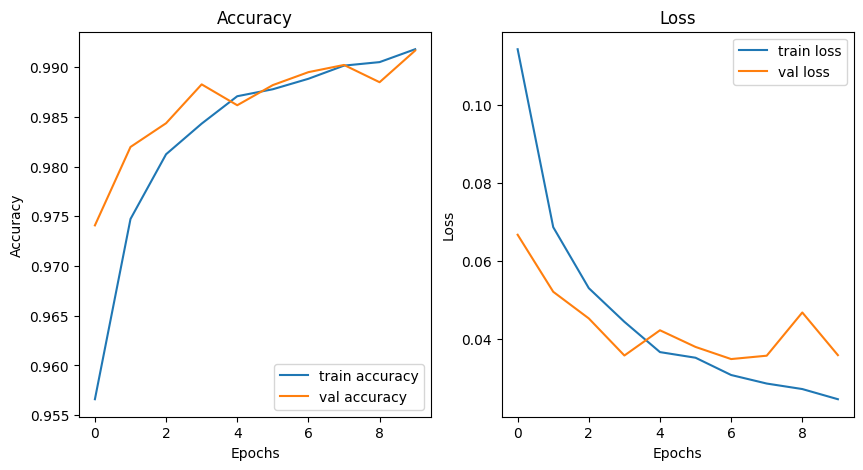

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Print the accuracies to feed to AI
print(f"Train Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

3461/3461 ━━━━━━━━━━━━━━━━━━━━ 56s 16ms/step - accuracy: 0.9939 - loss: 0.0221
Test Loss: 0.03244974464178085
Test Accuracy: 0.9914752244949341


In [ ]:
# Load and preprocess your custom image
from keras.utils import load_img, img_to_array
import numpy as np

# Path to your custom image
custom_image_path = f"../data/custom/bp_diseased.jpg"  # Replace with your actual image path

# Load the image
image = load_img(custom_image_path, target_size=IMG_SIZE)
image_array = img_to_array(image)  # Convert to numpy array
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
image_array = image_array / 255.0  # Normalize pixel values

# Predict the class
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions, axis=1)

# Map the predicted class index to the class label
print(f"Predicted Class: {class_names[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: Diseased


In [ ]:
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open(f"{PROJECT_DIR}/models/plant_disease__binary_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model successfully converted to TFLite format!")

INFO:tensorflow:Assets written to: /tmp/tmpimrrwcuf/assets


INFO:tensorflow:Assets written to: /tmp/tmpimrrwcuf/assets


Saved artifact at '/tmp/tmpimrrwcuf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor_160')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132790604651728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132790604654032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132790604655376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132790604653456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132790604655952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132790604654416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132790604652688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132790604654224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132790604652112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132790604658256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1327906046

W0000 00:00:1756295059.888068   14602 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1756295059.888090   14602 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-08-27 11:44:19.888512: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpimrrwcuf
2025-08-27 11:44:19.902857: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-08-27 11:44:19.902877: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpimrrwcuf
I0000 00:00:1756295060.034325   14602 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-08-27 11:44:20.057155: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-08-27 11:44:20.802678: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpimrrwcuf
2025-08-27 11:44:21.010424: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 